In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

def date_parser(ts):
    result = dt.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d %H:%M:%S')
    return result

beer_data = pd.read_csv('beer_reviews.csv', header=0, parse_dates=['review_time'], date_parser=date_parser)

In [2]:
beer_data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [3]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1586614 non-null  int64         
 1   brewery_name        1586599 non-null  object        
 2   review_time         1586614 non-null  datetime64[ns]
 3   review_overall      1586614 non-null  float64       
 4   review_aroma        1586614 non-null  float64       
 5   review_appearance   1586614 non-null  float64       
 6   review_profilename  1586266 non-null  object        
 7   beer_style          1586614 non-null  object        
 8   review_palate       1586614 non-null  float64       
 9   review_taste        1586614 non-null  float64       
 10  beer_name           1586614 non-null  object        
 11  beer_abv            1518829 non-null  float64       
 12  beer_beerid         1586614 non-null  int64         
dtypes: datetime6

In [4]:
beer_data.describe(include=[np.number]).round(3)

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1586614.000,1586614.000,1586614.000,1586614.000,1586614.000,1586614.000,1518829.000,1586614.000
mean,3130.099,3.816,3.736,3.842,3.744,3.793,7.042,21712.794
std,5578.104,0.721,0.698,0.616,0.682,0.732,2.323,21818.336
min,1.000,0.000,1.000,0.000,1.000,1.000,0.010,3.000
25%,143.000,3.500,3.500,3.500,3.500,3.500,5.200,1717.000
50%,429.000,4.000,4.000,4.000,4.000,4.000,6.500,13906.000
75%,2372.000,4.500,4.000,4.000,4.000,4.500,8.500,39441.000
max,28003.000,5.000,5.000,5.000,5.000,5.000,57.700,77317.000


In [5]:
beer_data.describe(include=['O'])

,brewery_name,review_profilename,beer_style,beer_name
count,1586599,1586266,1586614,1586614
unique,5742,33387,104,56857
top,Boston Beer Company (Samuel Adams),northyorksammy,American IPA,90 Minute IPA
freq,39444,5817,117586,3290


In [6]:
beer_id_grp = beer_data.groupby('beer_style')
beer_id_grp['review_overall'].agg(['min','max','median','mean','std']).sort_values(by='mean', ascending=False)

,min,max,median,mean,std
beer_style,,,,,
American Wild Ale,1.0,5.0,4.0,4.093262,0.654242
Gueuze,1.0,5.0,4.0,4.086287,0.641316
Quadrupel (Quad),1.0,5.0,4.0,4.071630,0.629628
Lambic - Unblended,1.0,5.0,4.0,4.048923,0.656766
American Double / Imperial Stout,1.0,5.0,4.0,4.029820,0.666457
...,...,...,...,...,...
Happoshu,1.0,5.0,3.0,2.914938,0.986379
Euro Strong Lager,1.0,5.0,3.0,2.862518,0.923887
Light Lager,1.0,5.0,2.5,2.698833,1.045755


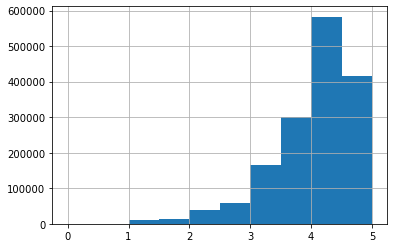

In [7]:
beer_data['review_overall'].hist(bins=10)

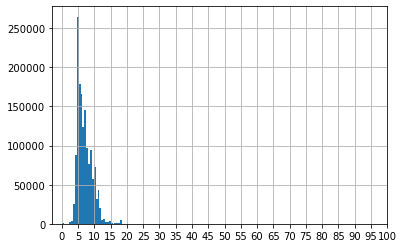

In [18]:
beer_data['beer_abv'].hist(bins=100)
plt.xticks([x for x in range(0,105,5)])
plt.show()

- Most beers (approximately 25% of the beers reviewed) have an ABV of 5.5%.

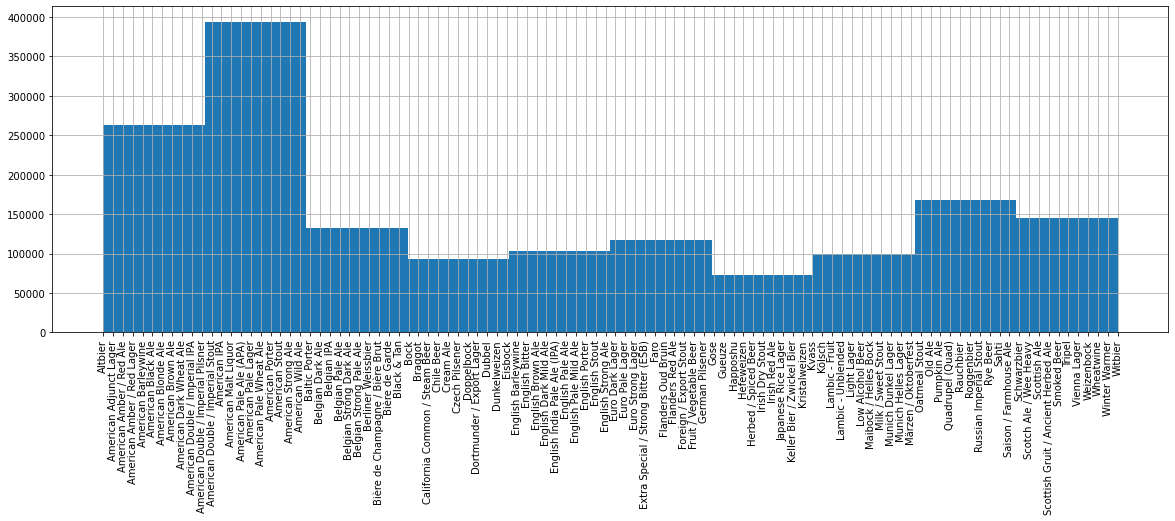

In [30]:
plt.figure(figsize=(20,6))
beer_data['beer_style'].sort_values(ascending=True).hist()
plt.xticks(rotation=90)
plt.show()

- We want to build a recommender system that recommends a user of BeerAdvocate.com a new beer to try, based on two criteria: 
    1. A user's previous reviews, if the user has a review history
    2. A user's survey result of preferred beers, if the user is new

In [33]:
#Use LightFM to build a hybrid recommender system
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

ModuleNotFoundError: No module named 'lightfm'